In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import ppscore as pps

In [2]:
data = pd.read_csv('Clicked Ads Dataset.csv')

In [3]:
df = data.copy()

In [4]:
df.head()

,Unnamed: 0,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad,city,province,category
0,0,68.95,35,432837300.0,256.09,Perempuan,3/27/2016 0:53,No,Jakarta Timur,Daerah Khusus Ibukota Jakarta,Furniture
1,1,80.23,31,479092950.0,193.77,Laki-Laki,4/4/2016 1:39,No,Denpasar,Bali,Food
2,2,69.47,26,418501580.0,236.50,Perempuan,3/13/2016 20:35,No,Surabaya,Jawa Timur,Electronic
3,3,74.15,29,383643260.0,245.89,Laki-Laki,1/10/2016 2:31,No,Batam,Kepulauan Riau,House
4,4,68.37,35,517229930.0,225.58,Perempuan,6/3/2016 3:36,No,Medan,Sumatra Utara,Finance


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                1000 non-null   int64  
 1   Daily Time Spent on Site  987 non-null    float64
 2   Age                       1000 non-null   int64  
 3   Area Income               987 non-null    float64
 4   Daily Internet Usage      989 non-null    float64
 5   Male                      997 non-null    object 
 6   Timestamp                 1000 non-null   object 
 7   Clicked on Ad             1000 non-null   object 
 8   city                      1000 non-null   object 
 9   province                  1000 non-null   object 
 10  category                  1000 non-null   object 
dtypes: float64(3), int64(2), object(6)
memory usage: 86.1+ KB


In [6]:
nums = df.loc[:, (df.dtypes == 'int64') | (df.dtypes == float)].columns.tolist()
cats = df.loc[:, (df.dtypes == 'object')].columns.tolist()

In [7]:
nums

['Unnamed: 0',
 'Daily Time Spent on Site',
 'Age',
 'Area Income',
 'Daily Internet Usage']

In [8]:
cats

['Male', 'Timestamp', 'Clicked on Ad', 'city', 'province', 'category']

In [9]:
cats.remove('Timestamp')

In [10]:
print(cats)

['Male', 'Clicked on Ad', 'city', 'province', 'category']


# EDA (Explanatory Data Analysis)

## Univariate Analysis

### Numerical Features

In [11]:
df[nums].describe().round(0)

,Unnamed: 0,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage
count,1000.0,987.0,1000.0,987.0,989.0
mean,500.0,65.0,36.0,384864671.0,180.0
std,289.0,16.0,9.0,94079990.0,44.0
min,0.0,33.0,19.0,97975500.0,105.0
25%,250.0,51.0,29.0,328632990.0,139.0
50%,500.0,68.0,35.0,399068320.0,183.0
75%,749.0,78.0,42.0,458355450.0,219.0
max,999.0,91.0,61.0,556393600.0,267.0


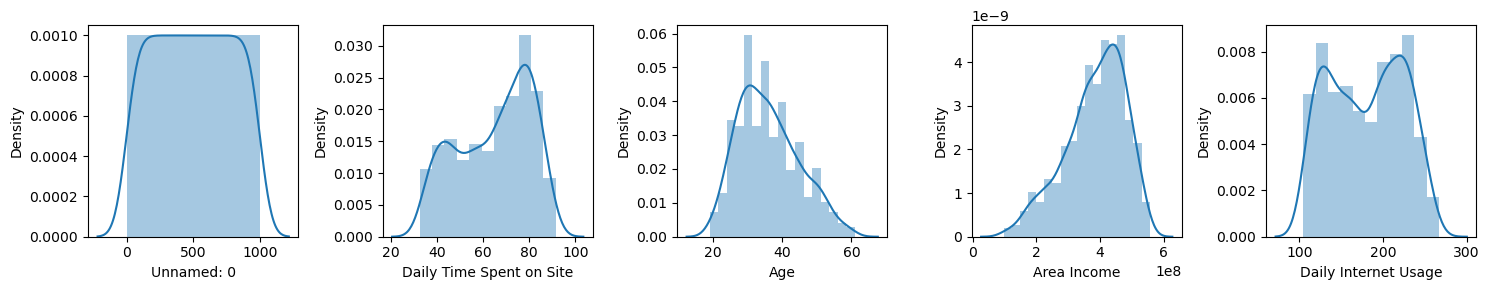

In [12]:
# distribution plot (distplot)
plt.figure(figsize = (15, 3))
for i in range(0, len(nums)):
    plt.subplot(1, 5, i+1)
    sns.distplot(df[nums[i]])
    plt.tight_layout()

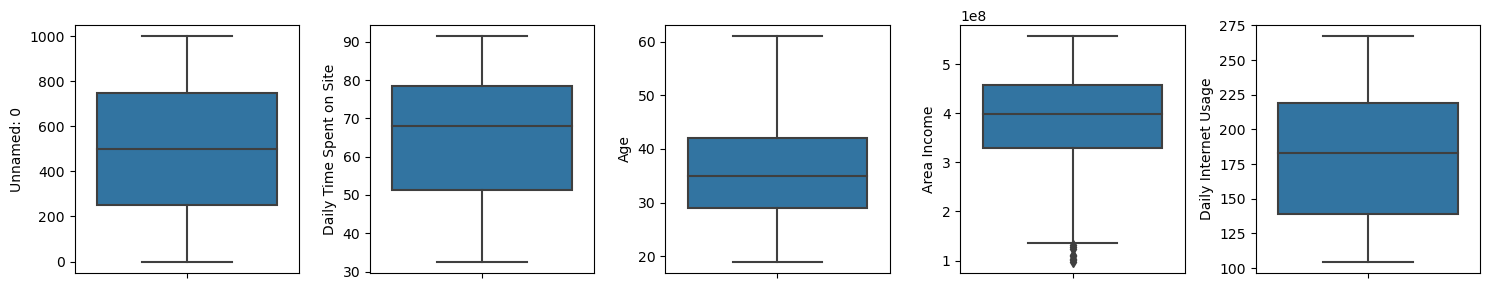

In [13]:
# boxplot distribution
plt.figure(figsize = (15, 3))
for i in range(0, len(nums)):
    plt.subplot(1, 5, i+1)
    sns.boxplot(df, y = df[nums[i]], orient = 'v')
    plt.tight_layout()

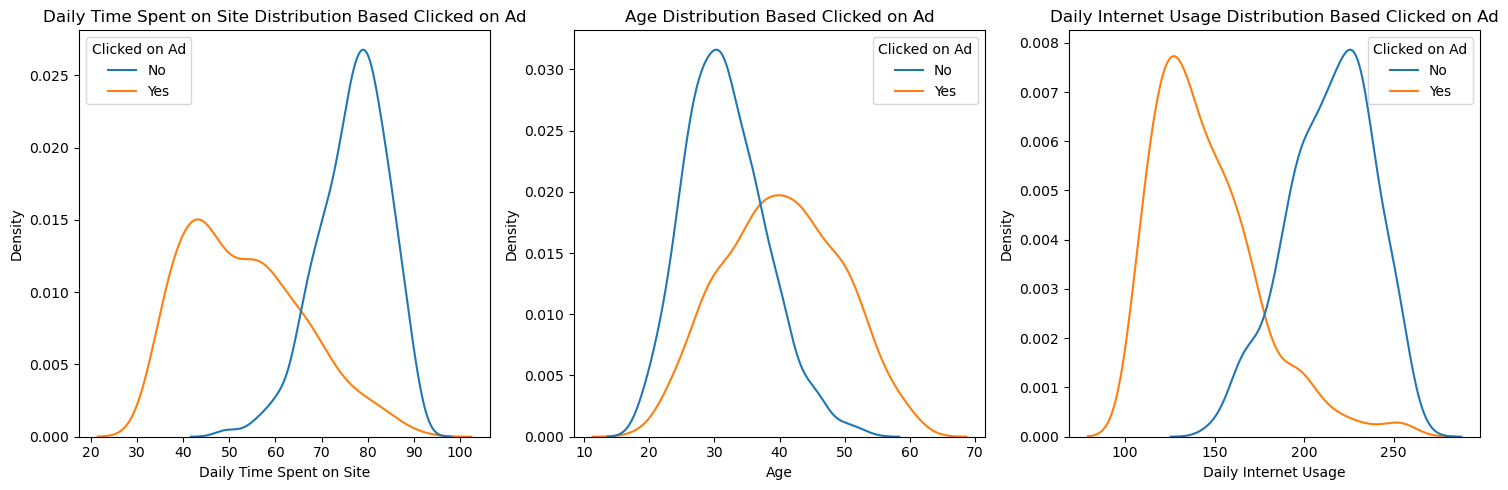

In [14]:
features = ['Daily Time Spent on Site', 'Age', 'Daily Internet Usage']

# distribution plot
plt.figure(figsize = (15, 5))
for i in range(0, len(features)):
    plt.subplot(1, 3, i+1)
    sns.kdeplot(df, x = df[features[i]], hue = df['Clicked on Ad']).set(title = f'{features[i]} Distribution Based Clicked on Ad')
    plt.tight_layout()

### Categorical Features

In [15]:
df[cats].describe()

,Male,Clicked on Ad,city,province,category
count,997,1000,1000,1000,1000
unique,2,2,30,16,10
top,Perempuan,No,Surabaya,Daerah Khusus Ibukota Jakarta,Otomotif
freq,518,500,64,253,112


In [16]:
for col in cats:
    print(f'''Value count kolom {col}:''')
    print('+' * 50)
    print(df[col].value_counts())
    print()

Value count kolom Male:
++++++++++++++++++++++++++++++++++++++++++++++++++
Perempuan    518
Laki-Laki    479
Name: Male, dtype: int64

Value count kolom Clicked on Ad:
++++++++++++++++++++++++++++++++++++++++++++++++++
No     500
Yes    500
Name: Clicked on Ad, dtype: int64

Value count kolom city:
++++++++++++++++++++++++++++++++++++++++++++++++++
Surabaya             64
Bandung              64
Jakarta Timur        63
Jakarta Selatan      61
Jakarta Barat        57
Bekasi               56
Medan                48
Jakarta Utara        45
Palembang            42
Semarang             41
Batam                34
Makassar             33
Tangerang Selatan    33
Tangerang            32
Depok                30
Bandar Lampung       29
Bogor                28
Jakarta Pusat        27
Malang               26
Banjarmasin          23
Pakanbaru            23
Denpasar             21
Padang               19
Balikpapan           18
Cimahi               17
Samarinda            16
Tasikmalaya          15
P

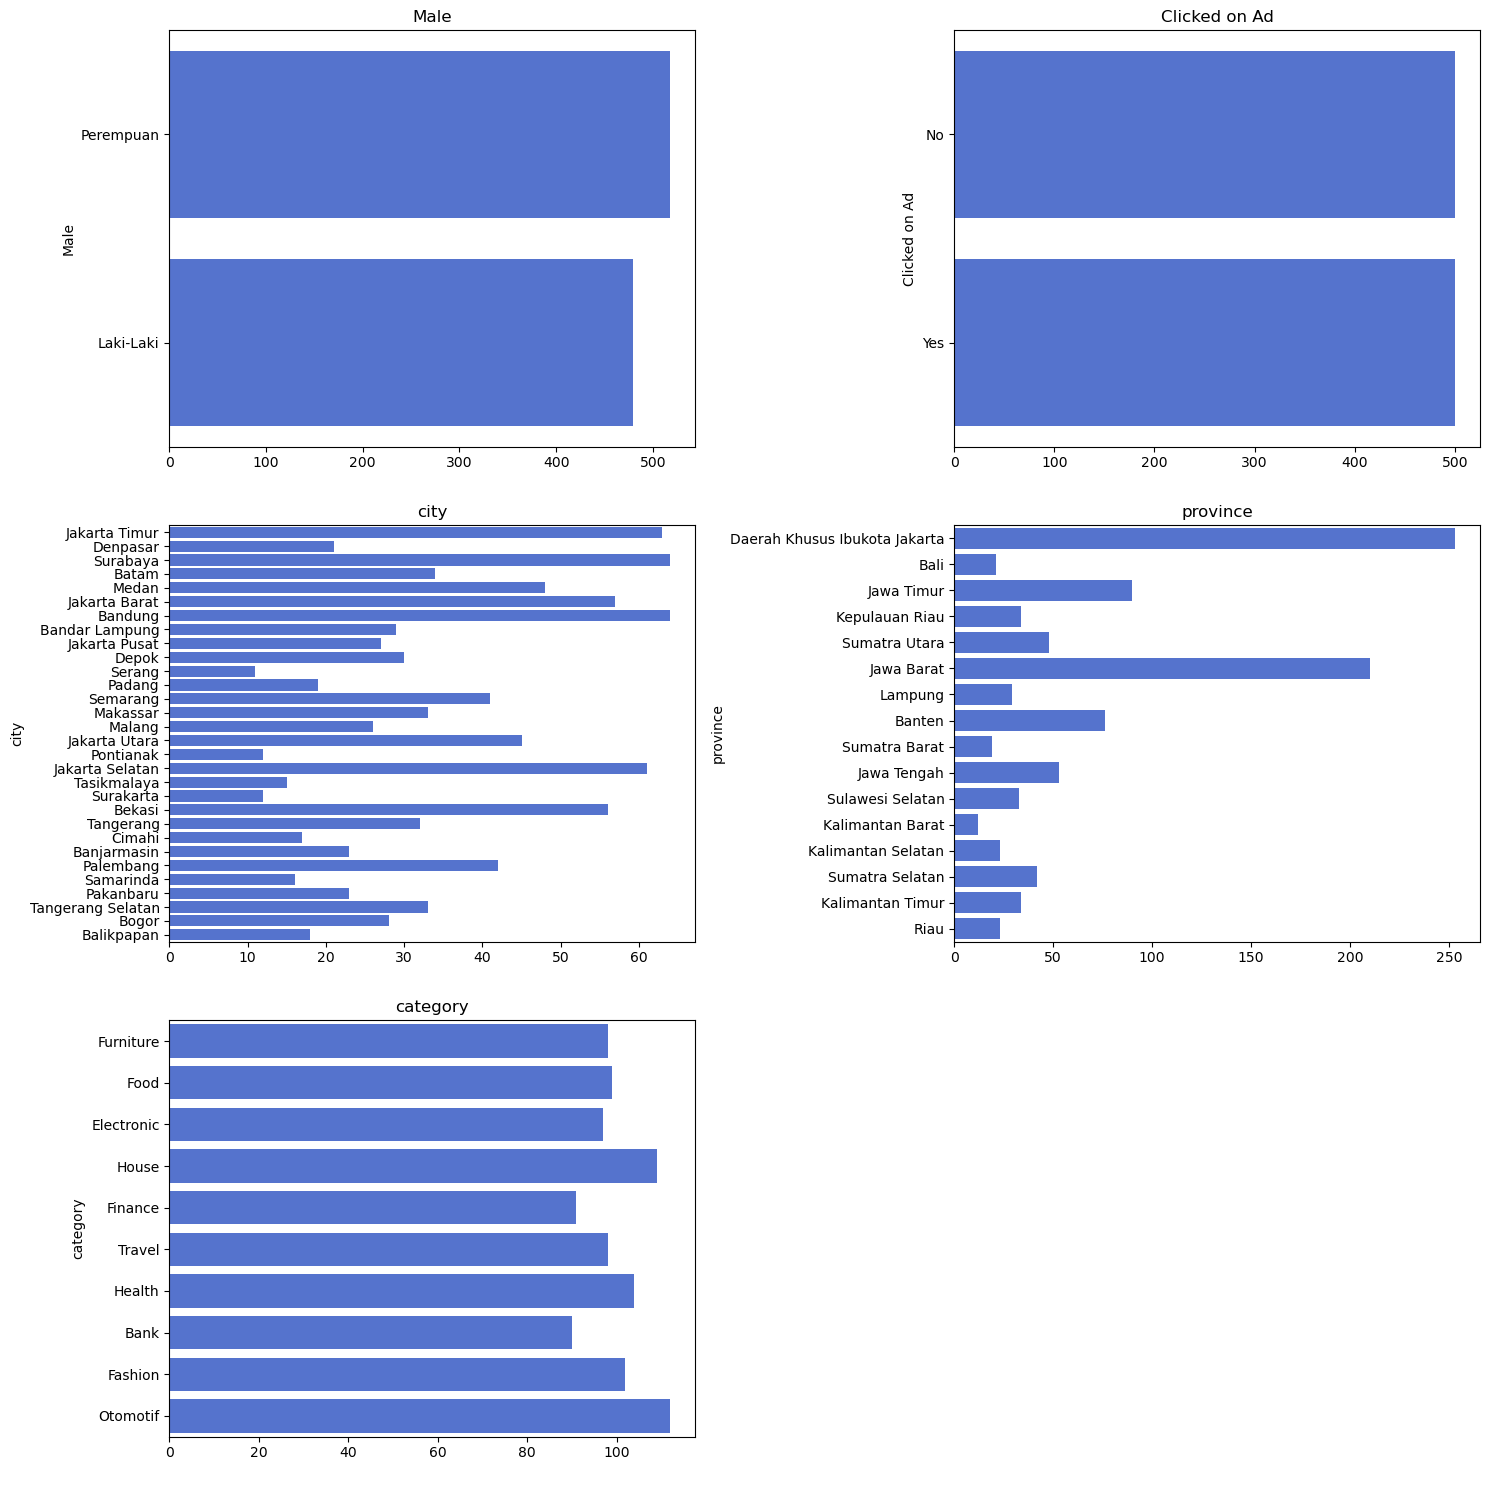

In [17]:
plt.figure(figsize=(15,15))
for i in range(0,len(cats)):
    plt.subplot(3,2,i+1)
    sns.countplot(y=df[cats[i]], orient = 'h',color ='royalblue')
    plt.title(cats[i])
    plt.xlabel(' ')
    plt.tight_layout()

## Bivariate Analysis

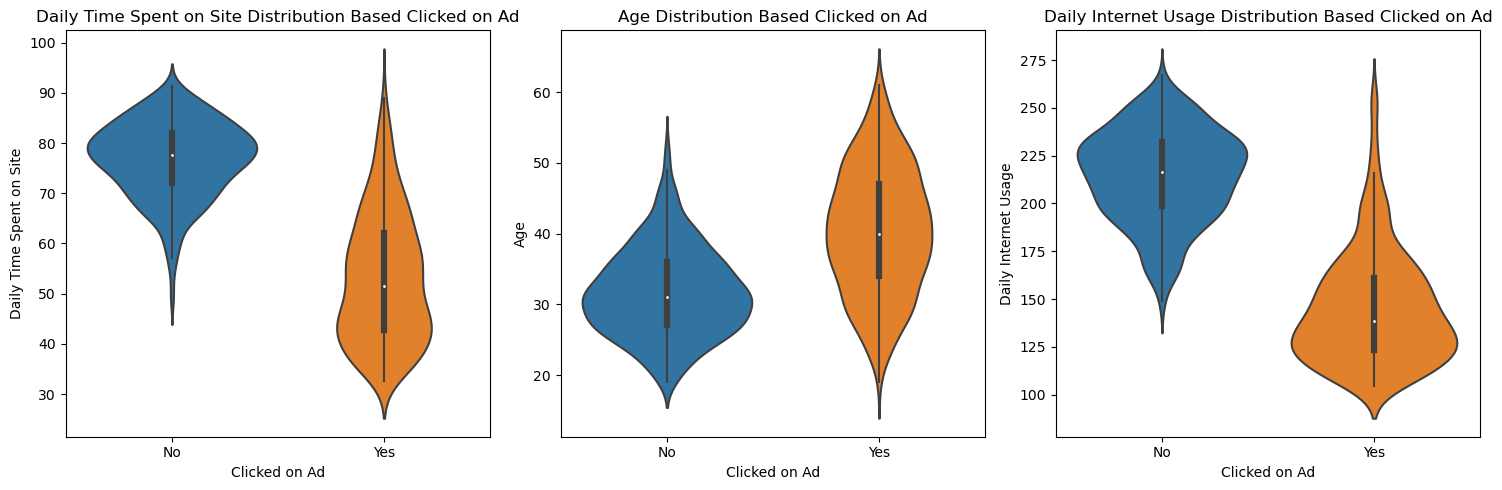

In [18]:
#  violinplot
plt.figure(figsize = (15, 5))
for i in range(0, len(features)):
    plt.subplot(1, 3, i+1)
    sns.violinplot(df, y = df[features[i]], x = df['Clicked on Ad']).set(title = f'{features[i]} Distribution Based Clicked on Ad')
    plt.tight_layout()

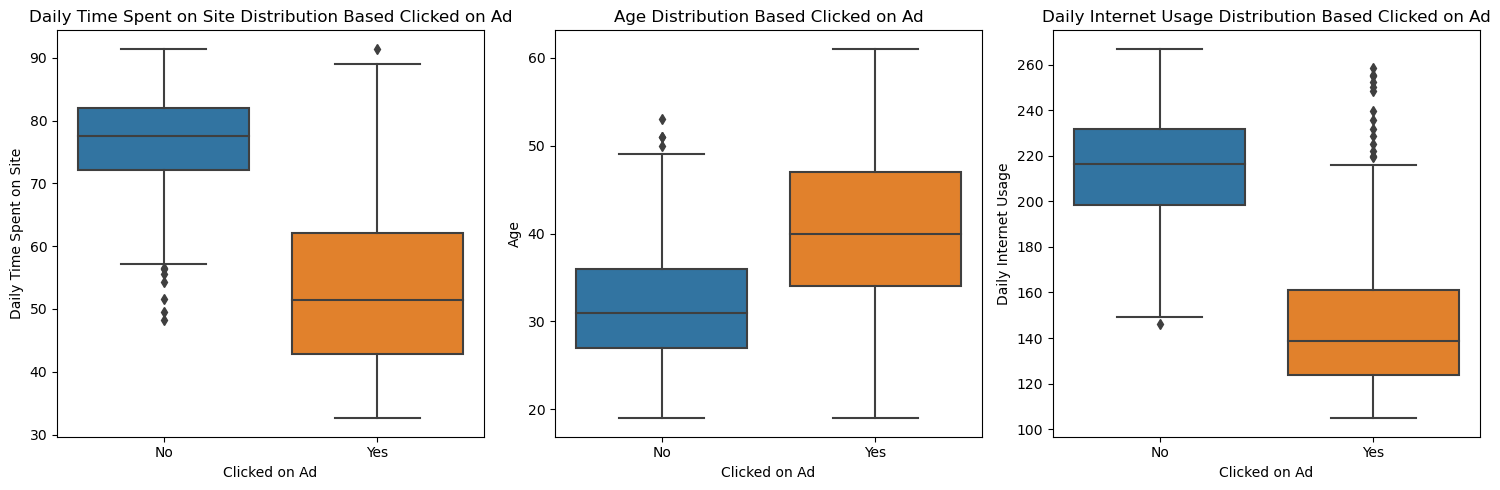

In [19]:
# boxplot
plt.figure(figsize = (15, 5))
for i in range(0, len(features)):
    plt.subplot(1, 3, i+1)
    sns.boxplot(df, y = df[features[i]], x = df['Clicked on Ad'], 
                orient = 'v').set(title = f'{features[i]} Distribution Based Clicked on Ad')
    plt.tight_layout()

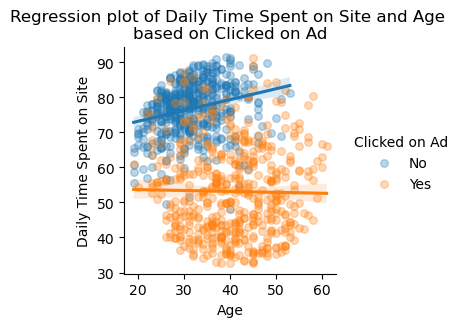

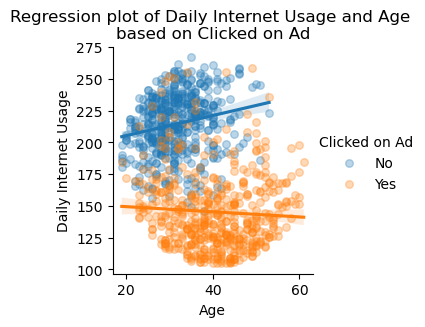

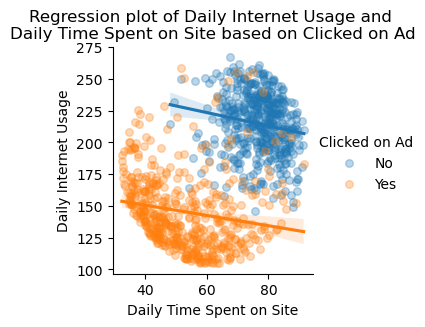

In [20]:
sns.lmplot(y='Daily Time Spent on Site', x='Age', data=df, hue='Clicked on Ad', height = 3,
           scatter_kws={'s':30, 'alpha':0.3}).set(title=f'Regression plot of Daily Time Spent on Site and Age \nbased on Clicked on Ad')
sns.lmplot(y='Daily Internet Usage', x='Age', data=df, hue='Clicked on Ad', height = 3,
           scatter_kws={'s':30, 'alpha':0.3}).set(title=f'Regression plot of Daily Internet Usage and Age \nbased on Clicked on Ad')
sns.lmplot(y='Daily Internet Usage', x='Daily Time Spent on Site', data=df, hue='Clicked on Ad', height = 3,
           scatter_kws={'s':30, 'alpha':0.3}).set(title=f'Regression plot of Daily Internet Usage and \nDaily Time Spent on Site based on Clicked on Ad')

### Categorical Features and Click on Ad

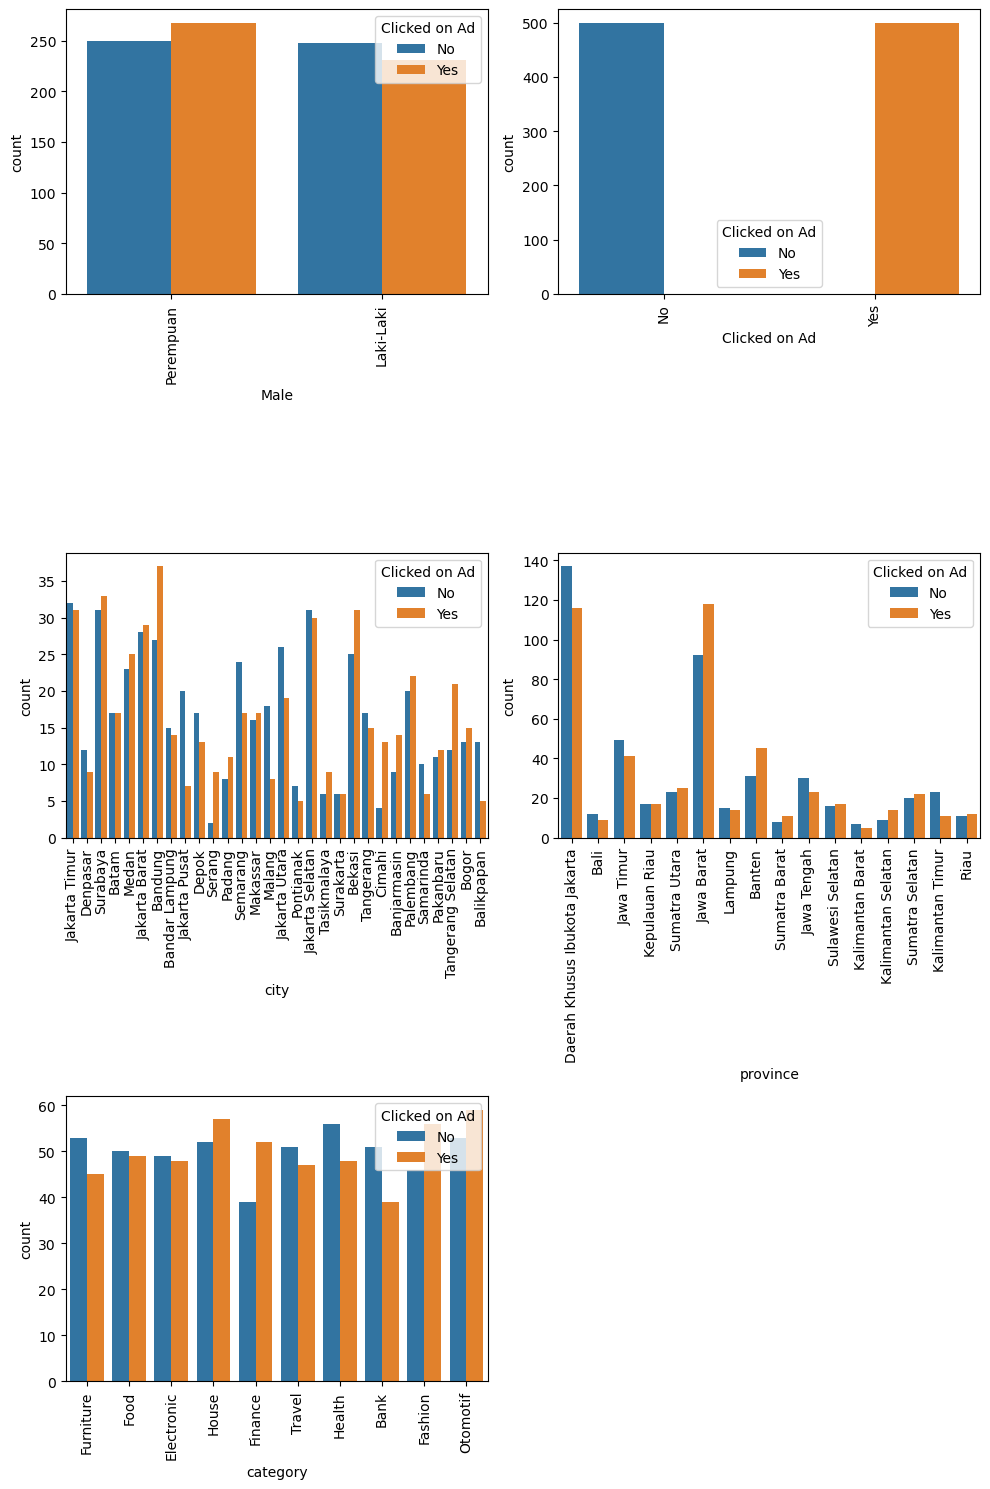

In [21]:
plt.figure(figsize=(10,15))
for i in range(0, len(cats)):
    plt.subplot(3, 2, i+1)
    sns.countplot(x=df[cats[i]], hue=df['Clicked on Ad'])
    plt.xlabel(cats[i])
    plt.xticks(rotation=90)
    plt.tight_layout()

### Multivariate Analysis

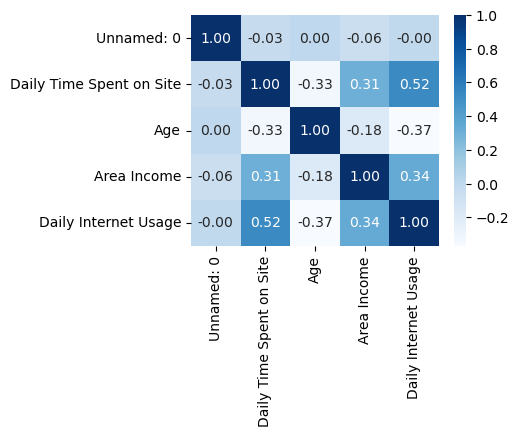

In [22]:
plt.figure(figsize = (4, 3))
sns.heatmap(df.corr(), annot = True, fmt ='.2f', cmap = 'Blues')
plt.show()

In [23]:
df_pps = pps.matrix(df)
matrix_df = df_pps[['x', 'y', 'ppscore']].pivot(columns = 'x', index = 'y', values = 'ppscore')

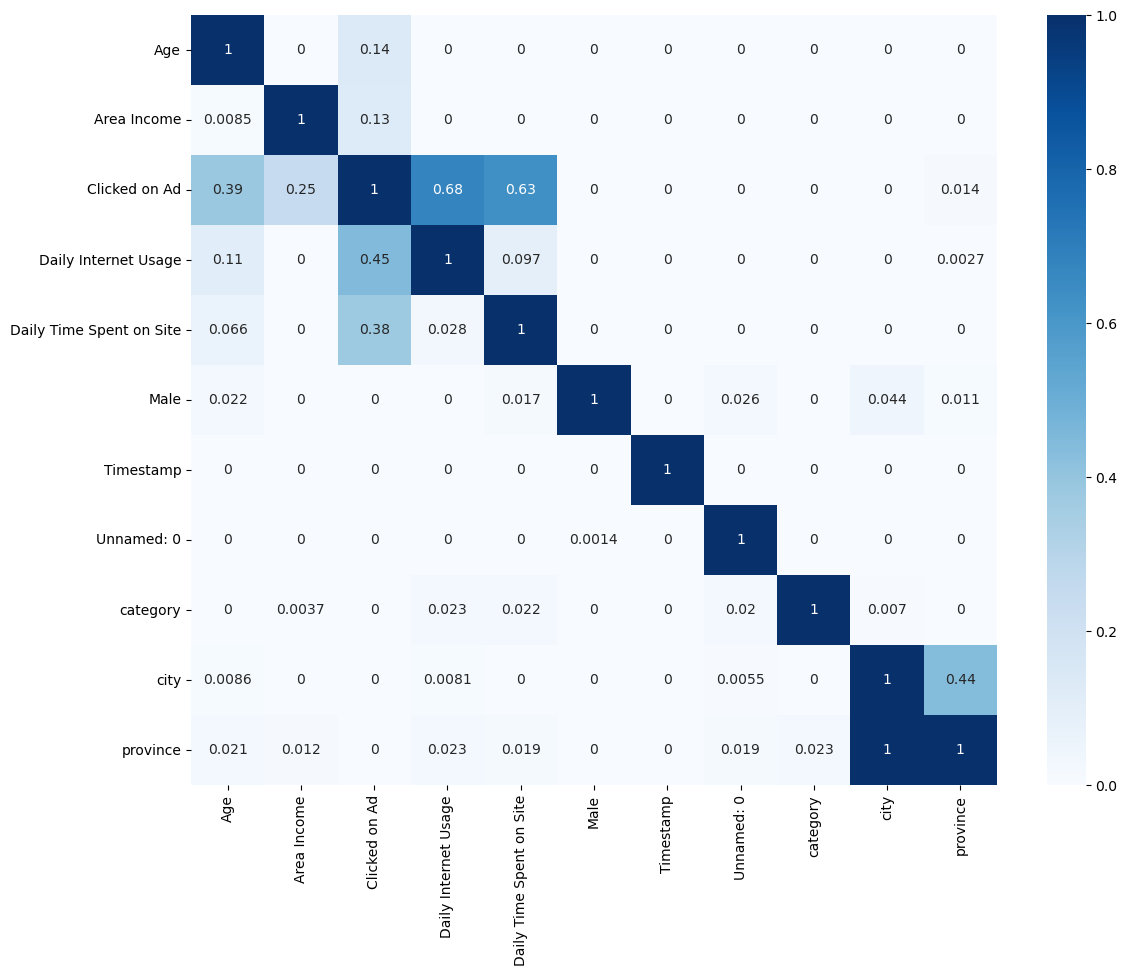

In [24]:
plt.figure(figsize = (13, 10))
sns.heatmap(matrix_df, vmin = 0, vmax = 1, cmap = 'Blues', annot = True)
plt.xlabel(None)
plt.ylabel(None)
plt.show()

# Data Cleaning & Preprocessing

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                1000 non-null   int64  
 1   Daily Time Spent on Site  987 non-null    float64
 2   Age                       1000 non-null   int64  
 3   Area Income               987 non-null    float64
 4   Daily Internet Usage      989 non-null    float64
 5   Male                      997 non-null    object 
 6   Timestamp                 1000 non-null   object 
 7   Clicked on Ad             1000 non-null   object 
 8   city                      1000 non-null   object 
 9   province                  1000 non-null   object 
 10  category                  1000 non-null   object 
dtypes: float64(3), int64(2), object(6)
memory usage: 86.1+ KB


## Handling Missing Values

In [26]:
df.isnull().sum().sort_values(ascending = False)

Daily Time Spent on Site    13
Area Income                 13
Daily Internet Usage        11
Male                         3
Unnamed: 0                   0
Age                          0
Timestamp                    0
Clicked on Ad                0
city                         0
province                     0
category                     0
dtype: int64

In [27]:
# handling missing values 'numeric' features using median
for col in df.select_dtypes(exclude = 'object'):
    df[col] = df[col].fillna(df[col].median())
df.isnull().sum()

Unnamed: 0                  0
Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Male                        3
Timestamp                   0
Clicked on Ad               0
city                        0
province                    0
category                    0
dtype: int64

In [28]:
# handling missing values 'male' feature
df['Male'].fillna('Perempuan', inplace = True)
df.isnull().sum()

Unnamed: 0                  0
Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Male                        0
Timestamp                   0
Clicked on Ad               0
city                        0
province                    0
category                    0
dtype: int64

In [29]:
df['Male'].value_counts()

Perempuan    521
Laki-Laki    479
Name: Male, dtype: int64

## Checking Duplicated Data

In [30]:
df.duplicated().sum()

0

## Feature Encoding

In [31]:
# 'Male' feature
mapping_gender = {'Perempuan' : 0,
                 'Laki-Laki' : 1}
df['Male'] = df['Male'].map(mapping_gender)

In [32]:
# Variable Target
mapping_target = {'Yes' : 1,
                 'No' : 0}
df['Clicked on Ad'] = df['Clicked on Ad'].map(mapping_target)

In [33]:
# Category feature
df = pd.get_dummies(df, columns = ['category'])

## Feature Extraction

In [34]:
# Converting timestamp column to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
# Extracting Timestamp feature into Year, Month, Weekday, and Day
df['Year'] = df['Timestamp'].dt.year
df['Month'] = df['Timestamp'].dt.month
df['Weekday'] = df['Timestamp'].dt.dayofweek
df['Day'] = df['Timestamp'].dt.day

In [35]:
df.head()

,Unnamed: 0,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad,city,province,...,category_Food,category_Furniture,category_Health,category_House,category_Otomotif,category_Travel,Year,Month,Weekday,Day
0,0,68.95,35,432837300.0,256.09,0,2016-03-27 00:53:00,0,Jakarta Timur,Daerah Khusus Ibukota Jakarta,...,0,1,0,0,0,0,2016,3,6,27
1,1,80.23,31,479092950.0,193.77,1,2016-04-04 01:39:00,0,Denpasar,Bali,...,1,0,0,0,0,0,2016,4,0,4
2,2,69.47,26,418501580.0,236.50,0,2016-03-13 20:35:00,0,Surabaya,Jawa Timur,...,0,0,0,0,0,0,2016,3,6,13
3,3,74.15,29,383643260.0,245.89,1,2016-01-10 02:31:00,0,Batam,Kepulauan Riau,...,0,0,0,1,0,0,2016,1,6,10
4,4,68.37,35,517229930.0,225.58,0,2016-06-03 03:36:00,0,Medan,Sumatra Utara,...,0,0,0,0,0,0,2016,6,4,3


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Unnamed: 0                1000 non-null   int64         
 1   Daily Time Spent on Site  1000 non-null   float64       
 2   Age                       1000 non-null   int64         
 3   Area Income               1000 non-null   float64       
 4   Daily Internet Usage      1000 non-null   float64       
 5   Male                      1000 non-null   int64         
 6   Timestamp                 1000 non-null   datetime64[ns]
 7   Clicked on Ad             1000 non-null   int64         
 8   city                      1000 non-null   object        
 9   province                  1000 non-null   object        
 10  category_Bank             1000 non-null   uint8         
 11  category_Electronic       1000 non-null   uint8         
 12  category_Fashion     

In [37]:
# Dropping Unnecessary Features
df = df.drop(columns = ['Unnamed: 0', 'Timestamp', 'city', 'province', 'Year'])

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Male                      1000 non-null   int64  
 5   Clicked on Ad             1000 non-null   int64  
 6   category_Bank             1000 non-null   uint8  
 7   category_Electronic       1000 non-null   uint8  
 8   category_Fashion          1000 non-null   uint8  
 9   category_Finance          1000 non-null   uint8  
 10  category_Food             1000 non-null   uint8  
 11  category_Furniture        1000 non-null   uint8  
 12  category_Health           1000 non-null   uint8  
 13  category_House            1000 non-null   uint8  
 14  category_

## Splitting Data into Feature and Target

In [39]:
X = df.drop(columns = ['Clicked on Ad'])
y = df['Clicked on Ad']

# Modelling

In [40]:
# splitting data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [41]:
y_test.value_counts()

1    154
0    146
Name: Clicked on Ad, dtype: int64

In [42]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier, XGBRegressor
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix, classification_report, roc_curve
from sklearn.inspection import permutation_importance

## Experiment 1

In [43]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score

def eval_classification(model):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    y_pred_proba = model.predict_proba(X_test)
    y_pred_proba_train = model.predict_proba(X_train)
    
    print('Accuracy (Train Set): %.2f' % accuracy_score(y_train, y_pred_train))
    print('Accuracy (Test Set): %.2f' % accuracy_score(y_test, y_pred))
    print('Precision (Train Set): %.2f' % precision_score(y_train, y_pred_train))
    print('Precision (Test Set): %.2f' % precision_score(y_test, y_pred))
    print('Recall (Train Set): %.2f' % recall_score(y_train, y_pred_train))
    print('Recall (Test Set): %.2f' % recall_score(y_test, y_pred))
    print('AUC (test-proba): %.2f' % roc_auc_score
          (y_test, y_pred_proba[:, 1]))
    print('AUC (train-proba): %.2f' % roc_auc_score(y_train, y_pred_proba_train[:, 1]))

def show_best_hyperparameter(model):
    print(model.best_estimator_.get_params())

### Logistic Regression

In [44]:
logreg = LogisticRegression(random_state = 42)
logreg.fit(X_train, y_train)

y_train_pred = logreg.predict(X_train)
y_pred = logreg.predict(X_test)
eval_classification(logreg)

Accuracy (Train Set): 0.51
Accuracy (Test Set): 0.49
Precision (Train Set): 0.00
Precision (Test Set): 0.00
Recall (Train Set): 0.00
Recall (Test Set): 0.00
AUC (test-proba): 0.73
AUC (train-proba): 0.79


In [45]:
# Hyperparameter Tuning for Logistic Regression
penalty = ['l1', 'l2']
C = [0.0001, 0.001, 0.01, 0.02, 0.03]
solver=['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
hyperparameter = dict(penalty=penalty, C=C, solver=solver)
logreg_tuned = RandomizedSearchCV(logreg, hyperparameter, scoring='recall' , cv=5, random_state=42)
logreg_tuned.fit(X_train, y_train)

y_train_pred = logreg_tuned.predict(X_train)
y_test_pred = logreg_tuned.predict(X_test)

eval_classification(logreg_tuned)

Accuracy (Train Set): 0.91
Accuracy (Test Set): 0.89
Precision (Train Set): 0.93
Precision (Test Set): 0.96
Recall (Train Set): 0.88
Recall (Test Set): 0.82
AUC (test-proba): 0.96
AUC (train-proba): 0.96


### Decision Tree

In [46]:
dt = DecisionTreeClassifier(random_state = 42)
dt.fit(X_train, y_train)

y_train_pred = dt.predict(X_train)
y_pred = dt.predict(X_test)
eval_classification(dt)

Accuracy (Train Set): 1.00
Accuracy (Test Set): 0.93
Precision (Train Set): 1.00
Precision (Test Set): 0.93
Recall (Train Set): 1.00
Recall (Test Set): 0.94
AUC (test-proba): 0.93
AUC (train-proba): 1.00


In [47]:
# Hyperparameter tuning for Decision Tree
param_grid = {
    'max_features' : ['auto', 'sqrt'],
    'max_depth' : [2, 4, 6, 7, 8],
    'min_samples_split' : [2, 5],
    'min_samples_leaf' : [1, 2]
}

dt_tuned = GridSearchCV(dt, param_grid, cv = 5, scoring = 'recall')
dt_tuned.fit(X_train, y_train)
y_train_pred = dt_tuned.predict(X_train)
y_test_pred = dt_tuned.predict(X_test)
eval_classification(dt_tuned)

Accuracy (Train Set): 0.96
Accuracy (Test Set): 0.89
Precision (Train Set): 0.99
Precision (Test Set): 0.95
Recall (Train Set): 0.93
Recall (Test Set): 0.84
AUC (test-proba): 0.91
AUC (train-proba): 0.99


### Random Forest

In [48]:
rf = RandomForestClassifier(random_state = 42)
rf.fit(X_train, y_train)

y_train_pred = rf.predict(X_train)
y_pred = rf.predict(X_test)
eval_classification(rf)

Accuracy (Train Set): 1.00
Accuracy (Test Set): 0.95
Precision (Train Set): 1.00
Precision (Test Set): 0.95
Recall (Train Set): 1.00
Recall (Test Set): 0.95
AUC (test-proba): 0.99
AUC (train-proba): 1.00


In [49]:
# Hyperparameter Tuning for Random Forest
param_grid = { 
    'max_depth' : [2,3],
    'min_samples_split' : [2, 5, 7], 
    'min_samples_leaf' : [2, 3], 
    'n_estimators': [100, 110],
    'max_features': ['auto', 'sqrt', 'log2'],
    'criterion' : ['gini', 'entropy']
}

rf_tuned = GridSearchCV(rf, param_grid, cv = 5, scoring = 'recall')
rf_tuned.fit(X_train, y_train)
y_train_pred = rf_tuned.predict(X_train)
y_test_pred = rf_tuned.predict(X_test)
eval_classification(rf_tuned)

Accuracy (Train Set): 0.97
Accuracy (Test Set): 0.94
Precision (Train Set): 0.98
Precision (Test Set): 0.95
Recall (Train Set): 0.95
Recall (Test Set): 0.94
AUC (test-proba): 0.99
AUC (train-proba): 1.00


### Adaboost

In [50]:
ab = AdaBoostClassifier(random_state = 42)
ab.fit(X_train, y_train)

y_train_pred = ab.predict(X_train)
y_pred = ab.predict(X_test)
eval_classification(ab)

Accuracy (Train Set): 0.99
Accuracy (Test Set): 0.95
Precision (Train Set): 1.00
Precision (Test Set): 0.96
Recall (Train Set): 0.98
Recall (Test Set): 0.94
AUC (test-proba): 0.98
AUC (train-proba): 1.00


In [51]:
# Hyperparameter Tuning 
param_grid = { 
    'learning_rate': [0.001, 0.01, 1],
    'n_estimators': [20, 60, 80],
    'algorithm' : ['SAMME.R', 'SAMME']
}

ab_tuned = GridSearchCV(ab, param_grid, cv = 5, scoring = 'recall')
ab_tuned.fit(X_train, y_train)

y_train_pred = ab_tuned.predict(X_train)
y_pred = ab_tuned.predict(X_test)
eval_classification(ab_tuned)

Accuracy (Train Set): 0.99
Accuracy (Test Set): 0.95
Precision (Train Set): 1.00
Precision (Test Set): 0.96
Recall (Train Set): 0.99
Recall (Test Set): 0.94
AUC (test-proba): 0.98
AUC (train-proba): 1.00


### Gradient Boosting

In [52]:
gb = GradientBoostingClassifier(random_state = 42)
gb.fit(X_train, y_train)

y_train_pred = gb.predict(X_train)
y_pred = gb.predict(X_test)
eval_classification(gb)

Accuracy (Train Set): 1.00
Accuracy (Test Set): 0.95
Precision (Train Set): 1.00
Precision (Test Set): 0.95
Recall (Train Set): 1.00
Recall (Test Set): 0.95
AUC (test-proba): 0.98
AUC (train-proba): 1.00


In [53]:
# Hyperparameter Tuning
param_grid = { 
    'max_depth' : [2,3],
    'min_samples_split' : [2], 
    'min_samples_leaf' : [2], 
    'n_estimators': [30,50,80],
    'max_features': ['auto', 'sqrt', 'log2'],
    'criterion' : ['friedman_mse'],
    'learning_rate' : [0.1],
    'loss': ['log_loss', 'exponential'],
    'subsample' : [1.0],
    
}

gb_tuned = GridSearchCV(gb, param_grid, cv = 5, scoring = 'recall')
gb_tuned.fit(X_train, y_train)

y_train_pred = gb_tuned.predict(X_train)
y_pred = gb_tuned.predict(X_test)
eval_classification(gb_tuned)

Accuracy (Train Set): 0.99
Accuracy (Test Set): 0.94
Precision (Train Set): 1.00
Precision (Test Set): 0.94
Recall (Train Set): 0.99
Recall (Test Set): 0.95
AUC (test-proba): 0.98
AUC (train-proba): 1.00


### XGBOOST

In [54]:
xg = XGBClassifier(random_state = 42)
xg.fit(X_train, y_train)

y_train_pred = xg.predict(X_train)
y_pred = xg.predict(X_test)
eval_classification(xg)

Accuracy (Train Set): 1.00
Accuracy (Test Set): 0.94
Precision (Train Set): 1.00
Precision (Test Set): 0.95
Recall (Train Set): 1.00
Recall (Test Set): 0.93
AUC (test-proba): 0.98
AUC (train-proba): 1.00


In [55]:
# Hyperparameter Tuning for XGBoost
hyperparameters = {
                    'max_depth' : [int(x) for x in np.linspace(10, 110, num = 11)],
                    'min_child_weight' : [int(x) for x in np.linspace(1, 20, num = 11)],
                    'gamma' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'tree_method' : ['auto', 'exact', 'approx', 'hist'],

                    'colsample_bytree' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'eta' : [float(x) for x in np.linspace(0, 1, num = 100)],

                    'lambda' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'alpha' : [float(x) for x in np.linspace(0, 1, num = 11)]
                    }

xg_tuned = RandomizedSearchCV(xg, hyperparameters, cv=5, random_state=42, scoring='recall')
xg_tuned.fit(X_train,y_train)

y_train_pred = xg_tuned.predict(X_train)
y_pred = xg_tuned.predict(X_test)
eval_classification(xg_tuned)

Accuracy (Train Set): 0.98
Accuracy (Test Set): 0.94
Precision (Train Set): 0.99
Precision (Test Set): 0.94
Recall (Train Set): 0.98
Recall (Test Set): 0.94
AUC (test-proba): 0.98
AUC (train-proba): 1.00


## Result

In [56]:
model_dicts = {}
model_dicts['Logistic Regression'] = logreg_tuned
model_dicts['Decision Tree'] = dt_tuned
model_dicts['Random Forest'] = rf_tuned
model_dicts['Gradient Boost'] = gb_tuned
model_dicts['AdaBoost'] = ab_tuned
model_dicts['XGBoost'] = xg_tuned

In [57]:
for model_name, model in model_dicts.items():
    print(f'Training Model {model_name}')
    %time model.fit(X_train, y_train)

Training Model Logistic Regression
CPU times: total: 5.28 s
Wall time: 3.18 s
Training Model Decision Tree
CPU times: total: 2.28 s
Wall time: 2.14 s
Training Model Random Forest
CPU times: total: 3min 56s
Wall time: 4min 7s
Training Model Gradient Boost
CPU times: total: 27.4 s
Wall time: 33.3 s
Training Model AdaBoost
CPU times: total: 16.1 s
Wall time: 20.4 s
Training Model XGBoost
CPU times: total: 25.6 s
Wall time: 6.87 s


In [58]:
import time

# create list to store prediction results
train_prediction_results = []
test_prediction_results = []

train_val_time_elapsed = []

for model_name, model in model_dicts.items():
    tstart = time.time()
    print(f'Model on {model_name}')
    # predict
    model_pred_test = model.predict(X_test)
    test_prediction_results.append(model_pred_test)
    
    # append result to list
    model_pred_train = model.predict(X_train)
    train_prediction_results.append(model_pred_train)
    
    tfinish = time.time()
    time_elapsed = round((tfinish - tstart) * 1000, 2)
    train_val_time_elapsed.append(time_elapsed)
    print(f'elapsed time: {time_elapsed} ms')

Model on Logistic Regression
elapsed time: 13.13 ms
Model on Decision Tree
elapsed time: 17.42 ms
Model on Random Forest
elapsed time: 70.88 ms
Model on Gradient Boost
elapsed time: 7.98 ms
Model on AdaBoost
elapsed time: 33.66 ms
Model on XGBoost
elapsed time: 15.61 ms


In [59]:
# create list to append evaluation metrics train
precision_train = []
recall_train = []
accuracy_train = []
confusion_m_train = []

# calculate error train
for y_pred in train_prediction_results:
    precision_train.append(precision_score(y_train, y_pred))
    recall_train.append(recall_score(y_train, y_pred))
    accuracy_train.append(accuracy_score(y_train, y_pred))
    confusion_m_train.append(confusion_matrix(y_train, y_pred))
    
# create list to append evaluation metrics train
precision_test = []
recall_test = []
accuracy_test = []
confusion_m_test = []

# calculate error train
for y_pred in test_prediction_results:
    precision_test.append(precision_score(y_test, y_pred))
    recall_test.append(recall_score(y_test, y_pred))
    accuracy_test.append(accuracy_score(y_test, y_pred))
    confusion_m_test.append(confusion_matrix(y_test, y_pred))
models_name = list(model_dicts.keys())
# create dataframe for model performances
eval_dict = {
    'model':model_dicts.keys(),
    'Recall_test': recall_test,
    'Recall_train': recall_train,
    'Accuracy_test': accuracy_test,
    'Accuracy_train': accuracy_train,
    'Time_Elapsed': train_val_time_elapsed
}
df_results1 = pd.DataFrame(data=eval_dict)
df_results1 = df_results1.set_index("model")
df_results1.sort_values(['Recall_test', 'Recall_train','Accuracy_test','Accuracy_train'], ascending = False)

,Recall_test,Recall_train,Accuracy_test,Accuracy_train,Time_Elapsed
model,,,,,
Gradient Boost,0.948052,0.988439,0.943333,0.994286,7.98
XGBoost,0.941558,0.979769,0.940000,0.984286,15.61
Random Forest,0.941558,0.950867,0.943333,0.967143,70.88
AdaBoost,0.935065,0.988439,0.946667,0.994286,33.66
Decision Tree,0.837662,0.927746,0.893333,0.960000,17.42
Logistic Regression,0.824675,0.884393,0.893333,0.911429,13.13


## Experiment 2

In [60]:
#std = ['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage', 'Month', 'Weekday', 'Day']

In [61]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
minmax_scaler = MinMaxScaler()
X_train_std = minmax_scaler.fit_transform(X_train)
X_test_std = minmax_scaler.transform(X_test)

### Logistic Regression

In [62]:
logreg = LogisticRegression(random_state = 24)
logreg.fit(X_train_std, y_train)

y_train_pred = logreg.predict(X_train_std)
y_pred = logreg.predict(X_test_std)
eval_classification(logreg)

Accuracy (Train Set): 0.51
Accuracy (Test Set): 0.49
Precision (Train Set): 0.00
Precision (Test Set): 0.00
Recall (Train Set): 0.00
Recall (Test Set): 0.00
AUC (test-proba): 0.50
AUC (train-proba): 0.50


In [63]:
# Hyperparameter Tuning for Logistic Regression
penalty = ['l1', 'l2']
C = [0.0001, 0.001, 0.01, 0.02, 0.03]
solver=['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
hyperparameter = dict(penalty=penalty, C=C, solver=solver)
logreg_tuned = RandomizedSearchCV(logreg, hyperparameter, scoring='recall' , cv=5, random_state=42)
logreg_tuned.fit(X_train_std, y_train)

y_train_pred = logreg_tuned.predict(X_train_std)
y_test_pred = logreg_tuned.predict(X_test_std)

eval_classification(logreg_tuned)

Accuracy (Train Set): 0.51
Accuracy (Test Set): 0.49
Precision (Train Set): 0.00
Precision (Test Set): 0.00
Recall (Train Set): 0.00
Recall (Test Set): 0.00
AUC (test-proba): 0.50
AUC (train-proba): 0.50


### Decision Tree

In [64]:
dt = DecisionTreeClassifier(random_state = 42)
dt.fit(X_train_std, y_train)

y_train_pred = dt.predict(X_train_std)
y_pred = dt.predict(X_test_std)
eval_classification(dt)

Accuracy (Train Set): 0.51
Accuracy (Test Set): 0.49
Precision (Train Set): 0.00
Precision (Test Set): 0.00
Recall (Train Set): 0.00
Recall (Test Set): 0.00
AUC (test-proba): 0.50
AUC (train-proba): 0.50


In [65]:
# Hyperparameter tuning for Decision Tree
param_grid = {
    'max_features' : ['auto', 'sqrt'],
    'max_depth' : [2, 4, 6, 7, 8],
    'min_samples_split' : [2, 5],
    'min_samples_leaf' : [1, 2]
}

dt_tuned = GridSearchCV(dt, param_grid, cv = 5, scoring = 'recall')
dt_tuned.fit(X_train_std, y_train)
y_train_pred = dt_tuned.predict(X_train_std)
y_test_pred = dt_tuned.predict(X_test_std)
eval_classification(dt_tuned)

Accuracy (Train Set): 0.49
Accuracy (Test Set): 0.52
Precision (Train Set): 0.42
Precision (Test Set): 0.74
Recall (Train Set): 0.09
Recall (Test Set): 0.11
AUC (test-proba): 0.53
AUC (train-proba): 0.48


### Random Forest

In [66]:
rf = RandomForestClassifier(random_state = 42)
rf.fit(X_train_std, y_train)

y_train_pred = rf.predict(X_train_std)
y_pred = rf.predict(X_test_std)
eval_classification(rf)

Accuracy (Train Set): 0.51
Accuracy (Test Set): 0.49
Precision (Train Set): 0.00
Precision (Test Set): 0.00
Recall (Train Set): 0.00
Recall (Test Set): 0.00
AUC (test-proba): 0.54
AUC (train-proba): 0.53


In [67]:
# Hyperparameter Tuning for Random Forest
param_grid = { 
    'max_depth' : [2,3],
    'min_samples_split' : [2, 5, 7], 
    'min_samples_leaf' : [2, 3], 
    'n_estimators': [100, 110],
    'max_features': ['auto', 'sqrt', 'log2'],
    'criterion' : ['gini', 'entropy']
}

rf_tuned = GridSearchCV(rf, param_grid, cv = 5, scoring = 'recall')
rf_tuned.fit(X_train_std, y_train)
y_train_pred = rf_tuned.predict(X_train_std)
y_test_pred = rf_tuned.predict(X_test_std)
eval_classification(rf_tuned)

Accuracy (Train Set): 0.51
Accuracy (Test Set): 0.49
Precision (Train Set): 0.00
Precision (Test Set): 0.00
Recall (Train Set): 0.00
Recall (Test Set): 0.00
AUC (test-proba): 0.49
AUC (train-proba): 0.55


### AdaBoost

In [68]:
ab = AdaBoostClassifier(random_state = 42)
ab.fit(X_train_std, y_train)

y_train_pred = ab.predict(X_train_std)
y_pred = ab.predict(X_test_std)
eval_classification(ab)

Accuracy (Train Set): 0.50
Accuracy (Test Set): 0.50
Precision (Train Set): 0.50
Precision (Test Set): 0.51
Recall (Train Set): 0.84
Recall (Test Set): 0.86
AUC (test-proba): 0.48
AUC (train-proba): 0.50


In [69]:
# Hyperparameter Tuning 
param_grid = { 
    'learning_rate': [0.001, 0.01, 1],
    'n_estimators': [20, 60, 80],
    'algorithm' : ['SAMME.R', 'SAMME']
}

ab_tuned = GridSearchCV(ab, param_grid, cv = 5, scoring = 'recall')
ab_tuned.fit(X_train_std, y_train)

y_train_pred = ab_tuned.predict(X_train_std)
y_pred = ab_tuned.predict(X_test_std)
eval_classification(ab_tuned)

Accuracy (Train Set): 0.50
Accuracy (Test Set): 0.51
Precision (Train Set): 0.49
Precision (Test Set): 0.51
Recall (Train Set): 0.99
Recall (Test Set): 0.99
AUC (test-proba): 0.48
AUC (train-proba): 0.50


### Gradient Boost

In [70]:
gb = GradientBoostingClassifier(random_state = 42)
gb.fit(X_train_std, y_train)

y_train_pred = gb.predict(X_train_std)
y_pred = gb.predict(X_test_std)
eval_classification(gb)

Accuracy (Train Set): 0.50
Accuracy (Test Set): 0.52
Precision (Train Set): 0.49
Precision (Test Set): 0.52
Recall (Train Set): 0.99
Recall (Test Set): 1.00
AUC (test-proba): 0.47
AUC (train-proba): 0.49


In [71]:
# Hyperparameter Tuning
param_grid = { 
    'max_depth' : [2,3],
    'min_samples_split' : [2], 
    'min_samples_leaf' : [2], 
    'n_estimators': [30,50,80],
    'max_features': ['auto', 'sqrt', 'log2'],
    'criterion' : ['friedman_mse'],
    'learning_rate' : [0.1],
    'loss': ['log_loss', 'exponential'],
    'subsample' : [1.0],
    
}

gb_tuned = GridSearchCV(gb, param_grid, cv = 5, scoring = 'recall')
gb_tuned.fit(X_train_std, y_train)

y_train_pred = gb_tuned.predict(X_train_std)
y_pred = gb_tuned.predict(X_test_std)
eval_classification(gb_tuned)

Accuracy (Train Set): 0.49
Accuracy (Test Set): 0.51
Precision (Train Set): 0.49
Precision (Test Set): 0.51
Recall (Train Set): 1.00
Recall (Test Set): 1.00
AUC (test-proba): 0.49
AUC (train-proba): 0.50


### XGBoost

In [72]:
xg = XGBClassifier(random_state = 42)
xg.fit(X_train_std, y_train)

y_train_pred = xg.predict(X_train_std)
y_pred = xg.predict(X_test_std)
eval_classification(xg)

Accuracy (Train Set): 0.51
Accuracy (Test Set): 0.49
Precision (Train Set): 0.00
Precision (Test Set): 0.00
Recall (Train Set): 0.00
Recall (Test Set): 0.00
AUC (test-proba): 0.47
AUC (train-proba): 0.51


In [73]:
# Hyperparameter Tuning for XGBoost
hyperparameters = {
                    'max_depth' : [int(x) for x in np.linspace(10, 110, num = 11)],
                    'min_child_weight' : [int(x) for x in np.linspace(1, 20, num = 11)],
                    'gamma' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'tree_method' : ['auto', 'exact', 'approx', 'hist'],

                    'colsample_bytree' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'eta' : [float(x) for x in np.linspace(0, 1, num = 100)],

                    'lambda' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'alpha' : [float(x) for x in np.linspace(0, 1, num = 11)]
                    }

xg_tuned = RandomizedSearchCV(xg, hyperparameters, cv=5, random_state=42, scoring='recall')
xg_tuned.fit(X_train_std,y_train)

y_train_pred = xg_tuned.predict(X_train_std)
y_pred = xg_tuned.predict(X_test_std)
eval_classification(xg_tuned)

Accuracy (Train Set): 0.51
Accuracy (Test Set): 0.49
Precision (Train Set): 0.00
Precision (Test Set): 0.00
Recall (Train Set): 0.00
Recall (Test Set): 0.00
AUC (test-proba): 0.49
AUC (train-proba): 0.50


## Result

In [74]:
model_dicts = {}
model_dicts['Logistic Regression'] = logreg_tuned
model_dicts['Decision Tree'] = dt_tuned
model_dicts['Random Forest'] = rf_tuned
model_dicts['Gradient Boost'] = gb_tuned
model_dicts['AdaBoost'] = ab_tuned
model_dicts['XGBoost'] = xg_tuned

In [75]:
for model_name, model in model_dicts.items():
    print(f'Training Model {model_name}')
    %time model.fit(X_train_std, y_train)

Training Model Logistic Regression
CPU times: total: 688 ms
Wall time: 386 ms
Training Model Decision Tree
CPU times: total: 1.25 s
Wall time: 1.04 s
Training Model Random Forest
CPU times: total: 3min 54s
Wall time: 3min 56s
Training Model Gradient Boost
CPU times: total: 19.6 s
Wall time: 19.7 s
Training Model AdaBoost
CPU times: total: 17.9 s
Wall time: 18.4 s
Training Model XGBoost
CPU times: total: 19.7 s
Wall time: 5.51 s


In [76]:
import time

# create list to store prediction results
train_prediction_results = []
test_prediction_results = []

train_val_time_elapsed = []

for model_name, model in model_dicts.items():
    tstart = time.time()
    print(f'Model on {model_name}')
    # predict
    model_pred_test = model.predict(X_test_std)
    test_prediction_results.append(model_pred_test)
    
    # append result to list
    model_pred_train = model.predict(X_train_std)
    train_prediction_results.append(model_pred_train)
    
    tfinish = time.time()
    time_elapsed = round((tfinish - tstart) * 1000, 2)
    train_val_time_elapsed.append(time_elapsed)
    print(f'elapsed time: {time_elapsed} ms')

Model on Logistic Regression
elapsed time: 0.0 ms
Model on Decision Tree
elapsed time: 0.0 ms
Model on Random Forest
elapsed time: 62.48 ms
Model on Gradient Boost
elapsed time: 15.64 ms
Model on AdaBoost
elapsed time: 31.23 ms
Model on XGBoost
elapsed time: 15.62 ms


In [77]:
# create list to append evaluation metrics train
precision_train = []
recall_train = []
accuracy_train = []
confusion_m_train = []

# calculate error train
for y_pred in train_prediction_results:
    precision_train.append(precision_score(y_train, y_pred))
    recall_train.append(recall_score(y_train, y_pred))
    accuracy_train.append(accuracy_score(y_train, y_pred))
    confusion_m_train.append(confusion_matrix(y_train, y_pred))
    
# create list to append evaluation metrics train
precision_test = []
recall_test = []
accuracy_test = []
confusion_m_test = []

# calculate error train
for y_pred in test_prediction_results:
    precision_test.append(precision_score(y_test, y_pred))
    recall_test.append(recall_score(y_test, y_pred))
    accuracy_test.append(accuracy_score(y_test, y_pred))
    confusion_m_test.append(confusion_matrix(y_test, y_pred))
models_name = list(model_dicts.keys())
# create dataframe for model performances
eval_dict = {
    'model':model_dicts.keys(),
    'Recall_test': recall_test,
    'Recall_train': recall_train,
    'Accuracy_test': accuracy_test,
    'Accuracy_train': accuracy_train,
    'Time_Elapsed': train_val_time_elapsed
}
df_results2 = pd.DataFrame(data=eval_dict)
df_results2 = df_results2.set_index("model")
df_results2.sort_values(['Recall_test', 'Recall_train','Accuracy_test','Accuracy_train'], ascending = False)

,Recall_test,Recall_train,Accuracy_test,Accuracy_train,Time_Elapsed
model,,,,,
Gradient Boost,0.948052,0.988439,0.943333,0.994286,15.64
XGBoost,0.941558,0.979769,0.940000,0.984286,15.62
Random Forest,0.941558,0.950867,0.943333,0.967143,62.48
AdaBoost,0.935065,0.988439,0.946667,0.994286,31.23
Logistic Regression,0.902597,0.927746,0.946667,0.962857,0.00
Decision Tree,0.837662,0.927746,0.893333,0.960000,0.00


# Model Evaluation

## Confusion Matrix

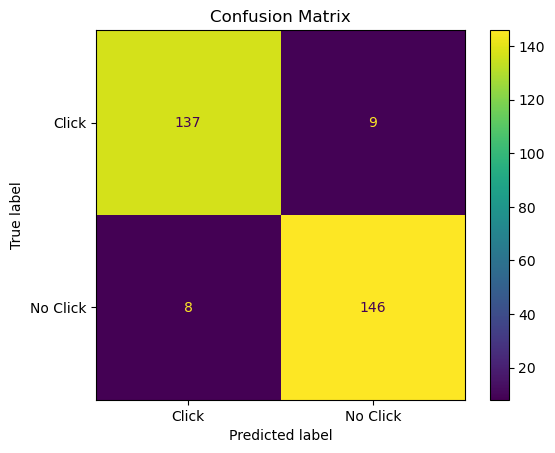

In [78]:
gb_tuned.fit(X_train_std,y_train)
y_train_pred = gb_tuned.predict(X_train_std)
y_test_pred = gb_tuned.predict(X_test_std)

cm = confusion_matrix(y_test, y_test_pred)
target_names = ['Click','No Click']

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot()
plt.title("Confusion Matrix")

plt.show()

## Feature Importance

In [79]:
def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

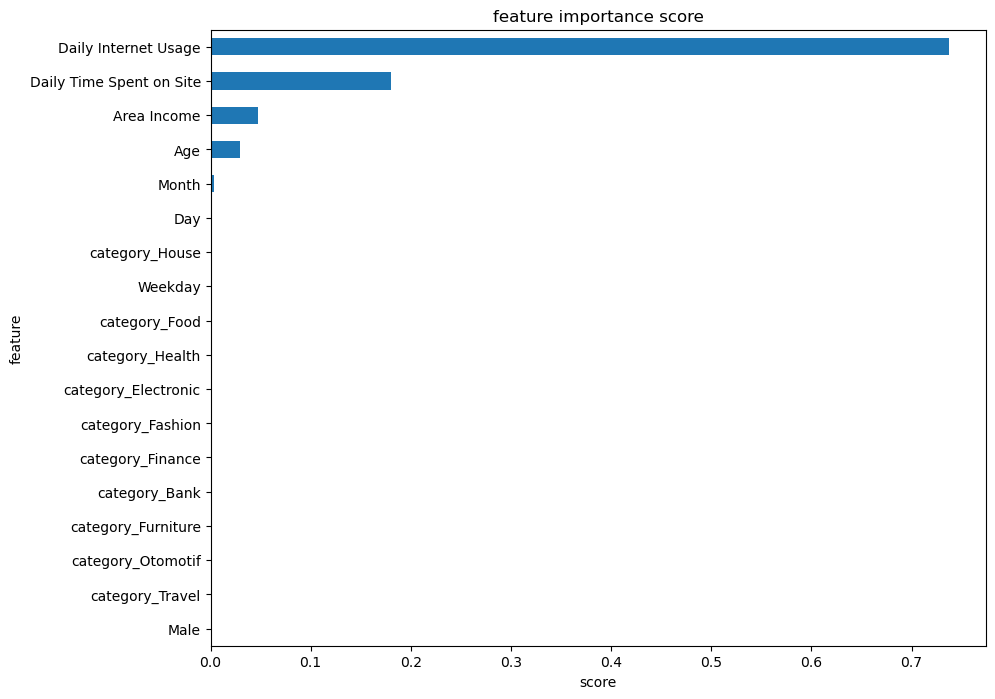

In [80]:
show_feature_importance(gb_tuned.best_estimator_)